In [1]:
import dm_event_2D
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 20})

# 2D DIMENSIONAL FIT

Dark Current [e/pix_binned*days]:  0.00042
Total Exposure [days]:  376.72777777777776
Lowest Cross Section:  1e-40
------------ Using Si model -----------
Number of Total Pixels:  75294720
Number of Signal events:  [0, 0]
28.09374995911826 g*days
------------ Using Si model -----------
Number of Total Pixels:  31962586
Number of Signal events:  [0, 0]
Number of electron peaks:  3
----------- Fixed Parameters -----------
$Norm$
$noise_{1}$
$noise_{2}$
$\sigma_{DM-e}$
----------------------------------
----------- Fit Result -----------
$Norm$ = 31962586.0
$\mu_{1}$ = 0.0009644496263304807
$\mu_{2}$ = -0.0009644496263304807
$noise_{1}$ = 0.24
$noise_{2}$ = 0.22
$\rho$ = 0.55003463224424
$\Omega_{1}$ = 1.199935970267647
$\Omega_{2}$ = 1.067540340103207
$\lambda_{1}$ = 0.0005124496240767428
$\lambda_{2}$ = 0.00012861226655132638
$\sigma_{DM-e}$ = -48.0
----------------------------------


No handles with labels found to put in legend.
/home/alantero/repositories/DAMIC_DMe/dm_event_2D.py:372: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.contour(X, Y, Z, verbose,colors='black', label = "Best Fit",alpha=0.6)


<Figure size 1152x720 with 0 Axes>

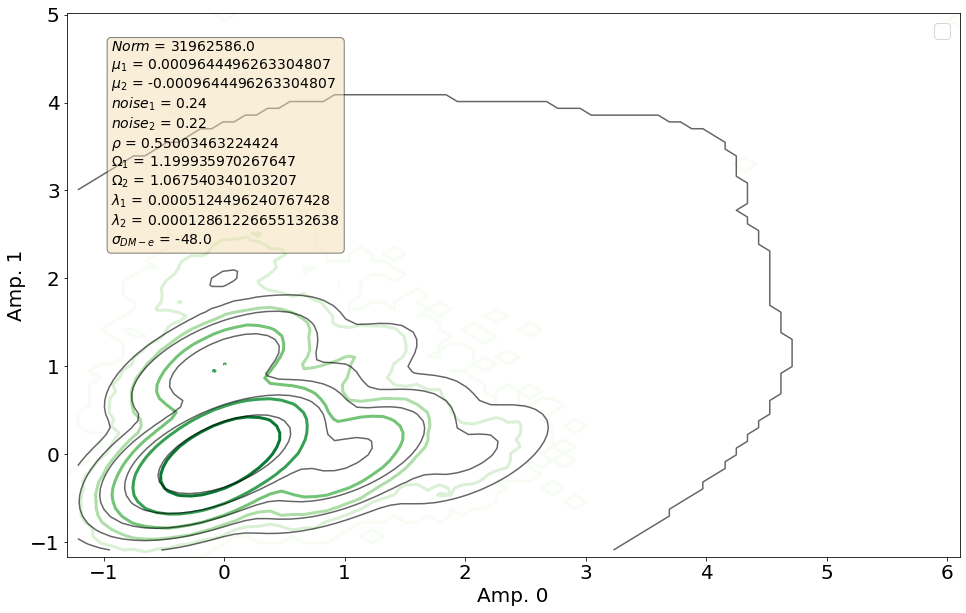

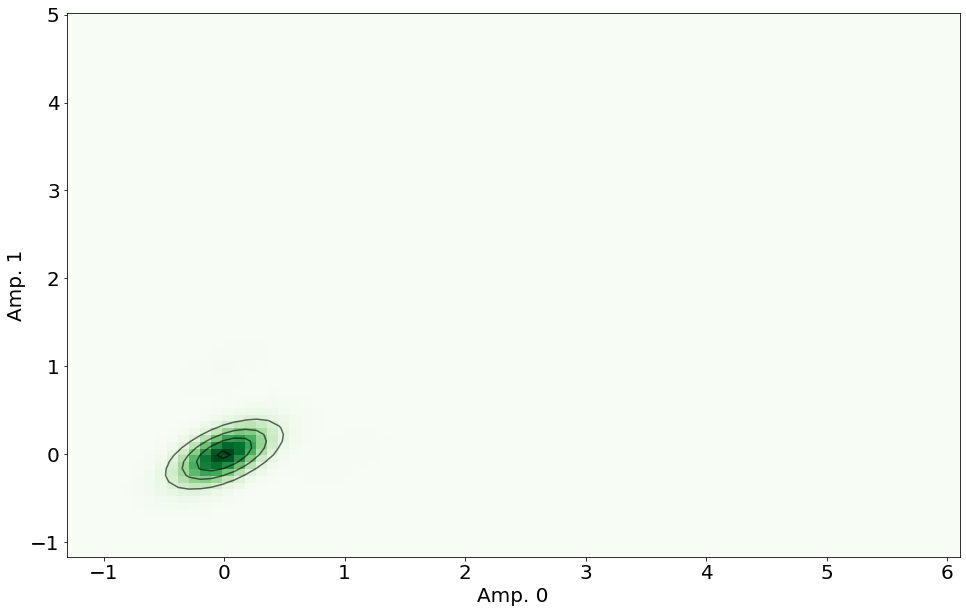

/home/alantero/repositories/DAMIC_DMe/dm_event_2D.py:280: RuntimeWarning: invalid value encountered in log
  lnL = np.sum(n_theo) - np.sum(n_data*np.log(n_theo))


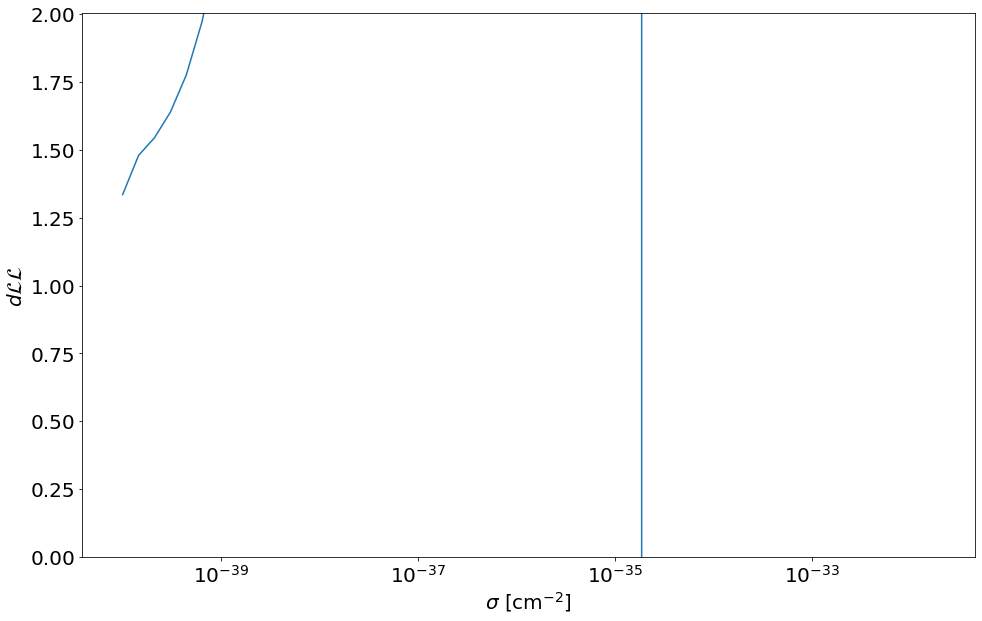

/home/alantero/repositories/DAMIC_DMe/dm_event_2D.py:280: RuntimeWarning: invalid value encountered in log
  lnL = np.sum(n_theo) - np.sum(n_data*np.log(n_theo))


1.9109529749704404e-35


In [2]:
nx, ny = 860, 640
nx_bin, ny_bin = 1,10
mass_ccd = 8.6e-3
masked_fraction = 0.15#(2+0.25)/100
nccd = 1
total_mass = nccd*mass_ccd*masked_fraction


dc = 0.00042#(15*15)*1e-6
print("Dark Current [e/pix_binned*days]: ", dc)#*1e8/(15**2*6.28*1e18*24*3600))
tread = 8.3*100/(30*24)
t_exp = 38*tread
print("Total Exposure [days]: ", mass_ccd*1e3*t_exp)
xmin, xmax = -4,4
mass_x = np.geomspace(0.6, 100, 10)*1e6
#noise = [0.2736756473111698,0.2195613985591587]
noise = [0.24, 0.22]


m=1e7


dm = dm_event_2D.dm_event2D(m,1e-40,0,total_mass,t_exp,noise, xmin=xmin, xmax=xmax,ccd_mass=mass_ccd,
                       tread=tread, nccd=nccd,nx=nx,ny=ny,nx_bin=nx_bin,ny_bin=ny_bin)
dm.verbose()
rho = 0.6#0.3534069155421202
#dm.simul_ev([dc,dc],rho=rho)
#dm.plot_hist2D()
dm.import_events("Events2D_Run2_6415.pkl")
dm.verbose()

nPeaks = 3

#dm.cross_section = 1e-33
x0 = [dm.npix,0,0,noise[0],noise[1],rho,1,1,dc,dc,-48]
pars_lims=[]
bnds = [(1e3,1e14),(-0.001,0.001),(-0.001,0.001),(0.1,0.4),(0.1,0.4),(0.55,0.7),
        (0.8,1.2),(0.8,1.2),(1e-5,1e-1),(1e-5,1e-1),(-40,-24)]
methods = ["Powell", "Nelder-Mead", "L-BFGS-B", "TNC"]
dm.likelihood(nPeaks=nPeaks, fix_pars=[0,3,4,10], x0=x0,verbose=5,pars_lims=bnds, method=methods[0], upper_limit=1.335)

In [3]:

nx, ny = 4000, 40
mass_ccd = 6e-3
masked_fraction = (2+0.25)/100
nccd = 1
total_mass = nccd*mass_ccd*masked_fraction


dc = (15*15)*1e-6
print("Dark Current [e/pix_binned*days]: ", dc)#*1e8/(15**2*6.28*1e18*24*3600))
tread = 8.3*100/(30*24)
t_exp = 38*tread
print("Total Exposure [days]: ", mass_ccd*1e3*t_exp)
xmin, xmax = -10,10
xs_35 = []
mass_x = np.geomspace(0.6, 100, 10)*1e6
noise = 1.6

#df_inf = pd.read_csv("DAMICM_Upper.csv", comment="#")
#mass_x = df_inf["mx"]

nPeaks = 3
n_reps = 1
xs_0 = np.zeros([len(mass_x),n_reps])
xs_1 = np.zeros([len(mass_x),n_reps])
xs_2 = np.zeros([len(mass_x),n_reps])

for i,m in enumerate(mass_x):
    for j in range(n_reps):
        print("------Mass {} GeV-------".format(m))
        dm = dm_event.dm_event(m,1e-33,0,total_mass,t_exp,noise, xmin=xmin, xmax=xmax,ccd_mass=mass_ccd,
                              tread=tread, nccd=nccd,nx=nx,ny=ny)

        dm.verbose()
        dm.likelihood(x0=[dm.npix,0,noise,1,dc,-27],fix_pars=[0,1,2,3,4],
                      pars_lims=[(1e4,1e10),(-0.1,0.1),(0.07,2.5),(0.8,1.2),(1e-4,1e0),(-40,-25)], 
                      verbose=False, simulate=dc, upper_limit=[1.355,True], nPeaks=nPeaks, bin_size=0.1)
        #print(dm.cross_section_dLL)
        xs_0[i][j] = dm.cross_section_dLL
        
        
        dm = dm_event.dm_event(m,1e-33,1,total_mass,t_exp,noise, xmin=xmin, xmax=xmax,ccd_mass=mass_ccd,
                              tread=tread, nccd=nccd,nx=nx,ny=ny)

        dm.verbose()
        dm.likelihood(x0=[dm.npix,0,noise,1,dc,-27],fix_pars=[0,1,2,3,4],
                      pars_lims=[(1e4,1e10),(-0.1,0.1),(0.07,2.5),(0.8,1.2),(1e-4,1e-2),(-40,-25)], 
                      verbose=False, simulate=dc, upper_limit=[1.355,True], nPeaks=nPeaks)
        #print(dm.cross_section_dLL)
        xs_1[i][j] = dm.cross_section_dLL
        
        
        dm = dm_event.dm_event(m,1e-33,2,total_mass,t_exp,noise, xmin=xmin, xmax=xmax,ccd_mass=mass_ccd,
                              tread=tread, nccd=nccd,nx=nx,ny=ny)

        dm.verbose()
        dm.likelihood(x0=[dm.npix,0,noise,1,dc,-27],fix_pars=[0,1,2,3,4],
                      pars_lims=[(1e4,1e10),(-0.1,0.1),(0.07,2.5),(0.8,1.2),(1e-4,1e-2),(-40,-25)], 
                      verbose=False, simulate=dc, upper_limit=[1.355,True], nPeaks=nPeaks)
        #print(dm.cross_section_dLL)
        xs_2[i][j] = dm.cross_section_dLL

        """
        plt.hist(dm.events, bins = 10, density = False)
        dm = dm_event.dm_event(14, 14, m, dm.cross_section_95, 0.6, 1, True, Eemin=0.06, Eemax=Eemax, eff="efficiency_DAMIC.csv")
        dm.plot_var("dRdE")
        plt.loglog()
        plt.xlim(0.06,1)
        plt.ylim(1e-3,1e2)
        plt.show()
        """
        
    df_inf = pd.read_csv("DAMICSNOLAB_q0.csv", comment="#")
    df_inf["mx"]
    x1,y1 = df_inf["mx"],df_inf["xs"]
    plt.plot(x1,y1, color="r", label=r"Paper Limit $q=0$", linewidth=4,alpha=0.6)
    
    
            
    df_inf = pd.read_csv("DAMICSNOLAB_q1.csv", comment="#")
    df_inf["mx"]
    x1,y1 = df_inf["mx"],df_inf["xs"]
    plt.plot(x1,y1, color="b", label=r"Paper Limit $q=1$", linewidth=4,alpha=0.6)
    
                
    df_inf = pd.read_csv("DAMICSNOLAB_q2.csv", comment="#")
    df_inf["mx"]
    x1,y1 = df_inf["mx"],df_inf["xs"]
    plt.plot(x1,y1, color="k", label=r"Paper Limit $q=2$", linewidth=4, alpha=0.6)
    
    
    #df_sup = pd.read_csv("DAMICS_sup.csv", comment="#")
    #x2,y2 = df_sup["mx"],df_sup["xs"]

    #plt.plot(x1,y1, 'o',label="DAMICM Upper Limit Papers")
    #plt.fill(
    #    np.append(x1, x2[::-1]),
    #    np.append(y1, y2[::-1]), color="r", alpha = 0.6, label="DAMIC Paper"
    #)

    xs_mean = np.median(xs_0, axis=1)
    xs_std = np.std(xs_0, axis=1)
    plt.plot(mass_x*1e-6,xs_mean,'--', color = "r")
    plt.fill_between(mass_x*1e-6,xs_mean-xs_std,(xs_mean+xs_std), label=r"q=0", alpha = 0.4, color = "r")

    xs_mean = np.median(xs_1, axis=1)
    xs_std = np.std(xs_1, axis=1)
    plt.plot(mass_x*1e-6,xs_mean,'--', color = "b")
    plt.fill_between(mass_x*1e-6,xs_mean-xs_std,(xs_mean+xs_std), label=r"q=1", alpha = 0.4, color = "b")

 
    xs_mean = np.median(xs_2, axis=1)
    xs_std = np.std(xs_2, axis=1)
    plt.plot(mass_x*1e-6,xs_mean,'--', color = "k")
    plt.fill_between(mass_x*1e-6,xs_mean-xs_std,(xs_mean+xs_std), label=r"q=2", alpha = 0.4, color = "k")

 
    
    plt.xlabel(r"Dark Matter Mass [MeV]")
    plt.ylabel(r"Dark Matter-e$^-$ $\sigma$ [cm$^2$]")
    plt.title("DAMIC-SNOLAB Upper Limits on Cross Section")
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1e-36,1e-27)
    plt.xlim(0.5,100)
    #plt.xticks([1,5,10], [1,5,10])
    #plt.yticks([10**i for i in range(-44,-34)], [r"$10^{"+str(i)+"}$" for i in range(-44,-34)])
    plt.grid(True, 'both')
    plt.legend(loc="best")
    plt.show()

Dark Current [e/pix_binned*days]:  0.000225
Total Exposure [days]:  262.83333333333337
------Mass 600000.0 GeV-------


NameError: name 'dm_event' is not defined